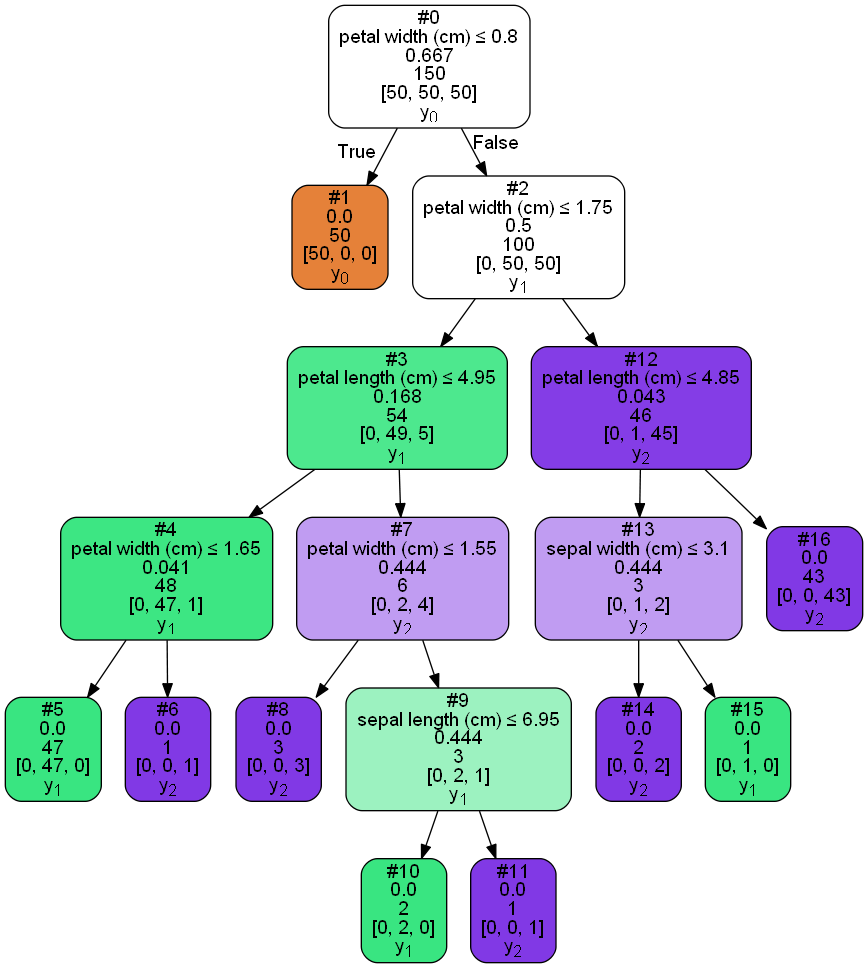

In [3]:
import sklearn.datasets as datasets
import pandas as pd

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus 


from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,     special_characters=True, class_names=True,label=True,node_ids=True,feature_names=df.columns, impurity=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [8]:
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print ("if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print ("} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print( "}")
                else:
                        print ("return " + str(value[node]))

        recurse(left, right, threshold, features, 0)
        
get_code(dtree, df.columns)

if ( petal width (cm) <= 0.800000011920929 ) {
return [[50.  0.  0.]]
} else {
if ( petal width (cm) <= 1.75 ) {
if ( petal length (cm) <= 4.949999809265137 ) {
if ( petal width (cm) <= 1.6500000953674316 ) {
return [[ 0. 47.  0.]]
} else {
return [[0. 0. 1.]]
}
} else {
if ( petal width (cm) <= 1.5499999523162842 ) {
return [[0. 0. 3.]]
} else {
if ( sepal length (cm) <= 6.949999809265137 ) {
return [[0. 2. 0.]]
} else {
return [[0. 0. 1.]]
}
}
}
} else {
if ( petal length (cm) <= 4.850000381469727 ) {
if ( sepal width (cm) <= 3.0999999046325684 ) {
return [[0. 0. 2.]]
} else {
return [[0. 1. 0.]]
}
} else {
return [[ 0.  0. 43.]]
}
}
}


In [5]:
# Required Python Packages
import pandas as pd
import numpy as np
from sklearn import tree
# creating dataset for modeling Apple / Orange classification
fruit_data_set = pd.DataFrame()
fruit_data_set["fruit"] = np.array([1, 1, 1, 1, 1,      # 1 for apple
                                    0, 0, 0, 0, 0])     # 0 for orange
fruit_data_set["weight"] = np.array([170, 175, 180, 178, 182,
                                     130, 120, 130, 138, 145])
fruit_data_set["smooth"] = np.array([9, 10, 8, 8, 7,
                                     3, 4, 2, 5, 6])

fruit_classifier = tree.DecisionTreeClassifier()
fruit_classifier.fit(fruit_data_set[["weight", "smooth"]], fruit_data_set["fruit"])

print(">>>>> Trained fruit_classifier <<<<<")
print(fruit_classifier)

>>>>> Trained fruit_classifier <<<<<
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [7]:
# fruit data set 1st observation
test_features_1 = [[fruit_data_set["weight"][0], fruit_data_set["smooth"][0]]]
test_features_1_fruit = fruit_classifier.predict(test_features_1)
print ("Actual fruit type: {act_fruit} , Fruit classifier predicted: {predicted_fruit}".format(
    act_fruit=fruit_data_set["fruit"][0], predicted_fruit=test_features_1_fruit))

# fruit data set 3rd observation
test_features_3 = [[fruit_data_set["weight"][2], fruit_data_set["smooth"][2]]]
test_features_3_fruit = fruit_classifier.predict(test_features_3)
print ("Actual fruit type: {act_fruit} , Fruit classifier predicted: {predicted_fruit}".format(
    act_fruit=fruit_data_set["fruit"][2], predicted_fruit=test_features_3_fruit))

# fruit data set 8th observation
test_features_8 = [[fruit_data_set["weight"][7], fruit_data_set["smooth"][7]]]
test_features_8_fruit = fruit_classifier.predict(test_features_8)
print("Actual fruit type: {act_fruit} , Fruit classifier predicted: {predicted_fruit}".format(
    act_fruit=fruit_data_set["fruit"][7], predicted_fruit=test_features_8_fruit))

Actual fruit type: 1 , Fruit classifier predicted: [1]
Actual fruit type: 1 , Fruit classifier predicted: [1]
Actual fruit type: 0 , Fruit classifier predicted: [0]


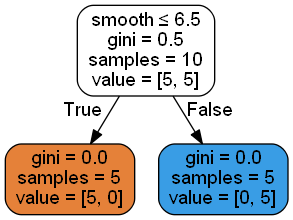

In [9]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
with open("fruit_classifier.txt", "w") as f:
    f = tree.export_graphviz(fruit_classifier, out_file=f)

dot_data = StringIO()
export_graphviz(fruit_classifier, out_file=dot_data,   filled=True, rounded=True, special_characters=True,feature_names=fruit_data_set.columns[1:], impurity=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [10]:
#get_lineage(fruit_classifier, fruit_data_set.columns)
get_code(fruit_classifier, fruit_data_set.columns)

if ( weight <= 6.5 ) {
return [[5. 0.]]
} else {
return [[0. 5.]]
}
